# Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+. 
# Описание проекта.

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- лог сервера с данными об их посещениях,

- выгрузка их покупок за этот период,

- рекламные расходы.

**Предстоит изучить:**

- откуда приходят пользователи и какими устройствами они пользуются;
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент;
- когда расходы на привлечение клиента окупаются;
- какие факторы мешают привлечению клиентов.

**Описание данных:**

Имеются три датасета. Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

**Структура visits_info_short.csv:**

`User Id` — уникальный идентификатор пользователя,

`Region` — страна пользователя,

`Device` — тип устройства пользователя,

`Channel` — идентификатор источника перехода,

`Session Start` — дата и время начала сессии,

`Session End` — дата и время окончания сессии.

**Структура orders_info_short.csv:**

`User Id` — уникальный идентификатор пользователя,

`Event Dt` — дата и время покупки,

`Revenue` — сумма заказа.

**Структура costs_info_short.csv:**

`dt` — дата проведения рекламной кампании,

`Channel` — идентификатор рекламного источника,

`costs` — расходы на эту кампанию.

#### Импортируем библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

#### Читаем файлы

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

**Начнём с таблички visits**

In [3]:
visits.head(15)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
#Немножко наведём порядок в данных и оформлении
visits.columns = visits.columns.str.lower().str.replace(' ','_')

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [6]:
print(visits['region'].unique())

['United States' 'UK' 'France' 'Germany']


In [7]:
print(visits['device'].unique())

['iPhone' 'Mac' 'Android' 'PC']


In [8]:
print(visits['channel'].unique())

['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


In [9]:
#проверим дубликаты
visits.duplicated().sum()

0

**Посмотрим на orders**

In [10]:
orders.head(15)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [12]:
#по аналогии с visits наводим порядок
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [13]:
#проверяем дубликаты
orders.duplicated().sum()

0

**Посмотрим на costs**

In [14]:
costs.head(15)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


In [15]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [16]:
#проводим знакомые манипуляции по наведению порядка
costs.columns = costs.columns.str.lower()
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [17]:
#проверяем дубликаты
costs.duplicated().sum()

0

#### Проделанная работа:

Были изменены названия столбцов. Данные в колонках с датами приведены в соответствующий формат. Дубликаты и пропуски отсутствуют.

### Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.


#### Функции для расчёта метрик

##### Функция для создания профилей пользователей

In [18]:
def get_profiles(sessions, orders, ad_costs):
    
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    #меняем дату первого посещения 
    profiles['dt'] = profiles['first_ts'].dt.date
    #меняем первый день месяца посещения
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique()) #добавляем т.н. донатеров(не придумал как их ещё назвать)
    
    #считаем уникальных пользователей по привлечению
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    #добавляем траты на рекламу и объединяем с числом привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    #стоимость привлечения 
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    #стоимость привлечения органических пользователей занулим
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

##### Функция для расчёта удержания пользователей

In [19]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False):
    
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

##### Функция для расчёта конверсии

In [20]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days-1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id','event_dt'])
        .groupby('user_id')
        .agg({'event_dt':'first'})
        .reset_index()
    )
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id','event_dt']], on='user_id',how='left'
    )
    
    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime']=(
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
    
    # функция для группировки таблицы по желаемым признакам    
    def group_by_dimensions(df,dims,horizon_days):
        result = df.pivot_table(
            index=dims,columns='lifetime', values='user_id', aggfunc = 'nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id':'nunique'})
            .rename(columns={'user_id':'cohort_size'})
        )
        result=cohort_sizes.merge(result, on=dims, how='left').fillna(0)
         
        # делим каждую «ячейку» в строке на размер когорты и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result=result[['cohort_size']+list(range(horizon_days))]
        result['cohort_size']=cohort_sizes
        return result
    
    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort in dimensions':
        dimensions = []
    
    # получаем таблицу динамики конверсии    
    result_in_time = group_by_dimensions(
        result_raw, dimensions +['dt'],horizon_days
    )
    
    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

##### Функция для расчета LTV и ROI

In [21]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

##### Функция для сглаживания фреймов по скользящему среднему

In [22]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

##### Функция для визуализации удержания

In [23]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )

    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

##### Функция для визуализации конверсии

In [24]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 6))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

##### Функция для визуализации LTV и ROI

In [25]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

##### Вывод

**Создали все основные и необходимые функции для возможности исследования маретинговых метрик:**

* Функция для создания профилей пользователей
* Функция для расчета Retention
* Функция для расчета конверсии
* Функция для расчетов LTV и ROI
* Функция для фильтрации(сглаживания) графиков по скользящему среднему
* Функция для визуализации удержания
* Функция для визуализации конверсии
* Функция для визуализации LTV и ROI

### Исследовательский анализ данных


#### Составляем профили пользователей

In [26]:
# Получим профили пользователей с помощью get_profiles
profiles = get_profiles(visits, orders, costs)
profiles.head(15)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


In [27]:
# Определим минамильную и максимальную даты
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()

print('Минимальная дата привлечения: {}\n'
     'Максимальная дата привлечения: {}'.format(min_analysis_date, max_analysis_date))

Минимальная дата привлечения: 2019-05-01
Максимальная дата привлечения: 2019-10-27


#### Пользователи по странам

In [28]:
profiles_by_region = (profiles
                     .pivot_table(index = 'region', values = 'payer', aggfunc = ['count','sum', 'mean'])
                     .rename(columns = {'count':'Пользователи', 'sum':'Платящие', 'mean': 'Доля Платящих'})
                     .droplevel(1, axis=1)
                     .sort_values(by='Доля Платящих', ascending=False)
                     .style.format({'Доля Платящих': '{:.2%}'})
                     )
profiles_by_region

,Пользователи,Платящие,Доля Платящих
region,,,
United States,100002,6902,6.90%
Germany,14981,616,4.11%
UK,17575,700,3.98%
France,17450,663,3.80%


Доля донатеров из США на 2.79% выше, чем в остальных регионах

#### Пользователи по устройствам

In [29]:
profiles_by_device = (profiles
                     .pivot_table(index = 'device', values = 'payer', aggfunc = ['count','sum', 'mean'])
                     .rename(columns = {'count':'Пользователи', 'sum':'Платящие', 'mean': 'Доля Платящих'})
                     .droplevel(1, axis=1)
                     .sort_values(by='Доля Платящих', ascending=False)
                     .style.format({'Доля Платящих': '{:.2%}'})
                     )
profiles_by_device

,Пользователи,Платящие,Доля Платящих
device,,,
Mac,30042,1912,6.36%
iPhone,54479,3382,6.21%
Android,35032,2050,5.85%
PC,30455,1537,5.05%


"Яблочные" девайсы в лидерах с Mac на первом месте и Iphone на втором, далее идут пользователи Android и завешают топ пользователи ПК

#### Пользователи по каналам привлечения

In [30]:
profiles_by_channel = (profiles
                     .pivot_table(index = 'channel', values = 'payer', aggfunc = ['count','sum', 'mean'])
                     .rename(columns = {'count':'Пользователи', 'sum':'Платящие', 'mean': 'Доля Платящих'})
                     .droplevel(1, axis=1)
                     .sort_values(by='Доля Платящих', ascending=False)
                     .style.format({'Доля Платящих': '{:.2%}'})
                     )
profiles_by_channel

,Пользователи,Платящие,Доля Платящих
channel,,,
FaceBoom,29144,3557,12.20%
AdNonSense,3880,440,11.34%
lambdaMediaAds,2149,225,10.47%
TipTop,19561,1878,9.60%
RocketSuperAds,4448,352,7.91%
WahooNetBanner,8553,453,5.30%
YRabbit,4312,165,3.83%
MediaTornado,4364,156,3.57%
LeapBob,8553,262,3.06%


Топ каналов возглавляет **FaceBoom(12,2%)**, самая малая доля донатеров - из **organic(2,06%)**

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Общая сумма расходов на маркетинг

In [31]:
cac_sum = costs['costs'].sum().round(2)
cac_sum

105497.3

Итак, на рекламнеую компанию потрачено **105497.3$**

#### Распределение по рекламным источникам

In [32]:
cac_by_channel = (costs
                 .pivot_table(index='channel', values = 'costs', aggfunc = 'sum')
                 .sort_values(by='costs', ascending=False)
                 .rename(columns = {'costs':'Затрачено $'})
                 )
cac_by_channel['Доля'] = (cac_by_channel['Затрачено $']/cac_by_channel['Затрачено $'].sum())
cac_by_channel = cac_by_channel.style.format({'Доля':'{:.2%}'})
cac_by_channel

,Затрачено $,Доля
channel,,
TipTop,54751.300000,51.90%
FaceBoom,32445.600000,30.75%
WahooNetBanner,5151.000000,4.88%
AdNonSense,3911.250000,3.71%
OppleCreativeMedia,2151.250000,2.04%
RocketSuperAds,1833.000000,1.74%
LeapBob,1797.600000,1.70%
lambdaMediaAds,1557.600000,1.48%
MediaTornado,954.480000,0.90%


Основную долю расходов берут (более 80%) на себя **TipTop** и **FaceBoom.**

#### Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

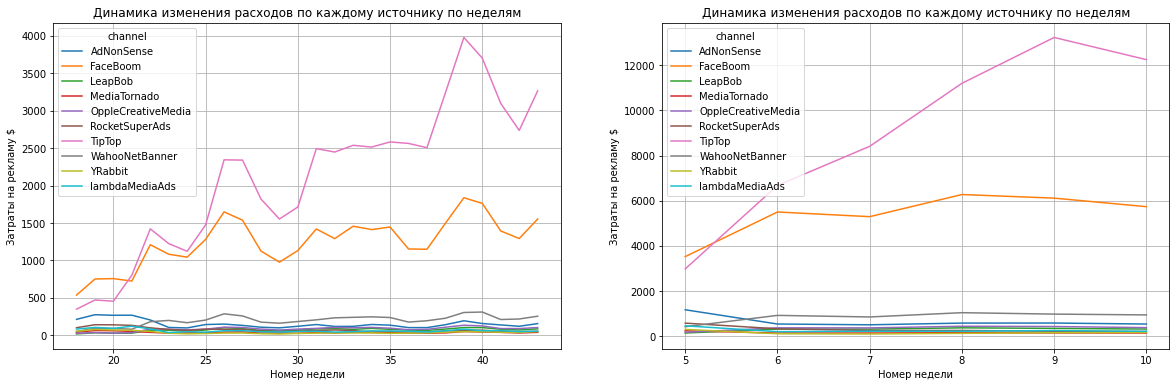

In [33]:
costs['date_month'] = pd.DatetimeIndex(costs['dt']).month
costs['date_week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

plt.figure(figsize=(20, 6))
cac_in_week = (costs
              .pivot_table(index = 'date_week', columns='channel', values='costs',aggfunc='sum')
              )
cac_in_week.plot(grid=True, ax=plt.subplot(1, 2, 1))
plt.title('Динамика изменения расходов по каждому источнику по неделям')
plt.xlabel('Номер недели')
plt.ylabel('Затраты на рекламу $')

cac_in_month = (costs
               .pivot_table(index='date_month',columns='channel', values='costs', aggfunc='sum')
               )
cac_in_month.plot(grid=True, ax=plt.subplot(1, 2, 2))
plt.title('Динамика изменения расходов по каждому источнику по неделям')
plt.xlabel('Номер недели')
plt.ylabel('Затраты на рекламу $')
plt.show()

Судя по графикам большая часть денег ушла на рекламу **TipTop** и **FaceBoom**

##### Посмотрим на циферки

Посмотрим, сколько в среднем стоило привлечение одного пользователя из каждого источника

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


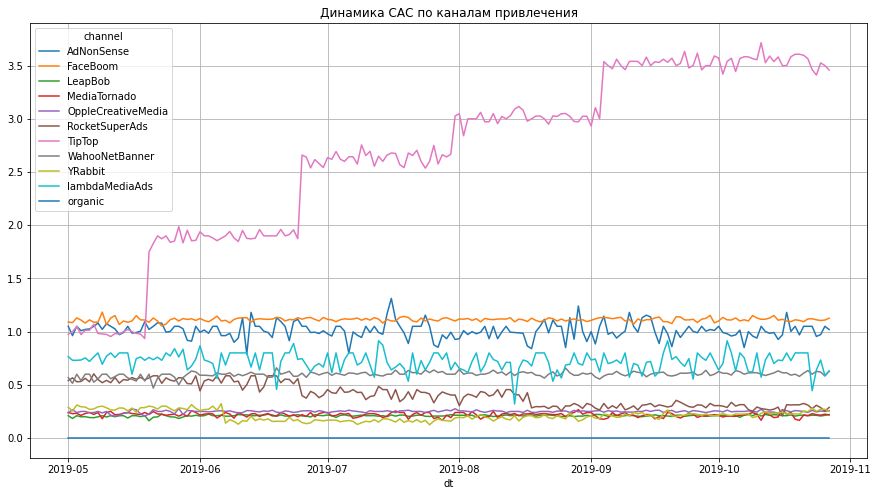

In [34]:
avg_cac = (profiles
          .pivot_table(index = 'channel', values='acquisition_cost', aggfunc='mean')
          .sort_values(by = 'acquisition_cost', ascending=False)
          )
display(avg_cac)

(profiles
.pivot_table(index='dt', columns='channel', values='acquisition_cost', aggfunc='mean')
.plot(grid=True, figsize=(15,8))
)
plt.title('Динамика САС по каналам привлечения')
plt.show()

In [35]:
print('Средний САС на одного пользователя:',
     round(profiles.query('channel !="organic"')['acquisition_cost'].mean(), 2), '$')

Средний САС на одного пользователя: 1.13 $


Самые дорогие пользователи из **TipTop**(в среднем 3 доллара)

#### Вывод

Общая сумма затрат на маркетинг за всю рекламную компанию - **105 497 долларов**

Средняя стоимость привлечения - **1.13 долларов**

Более 80% средств направленно на **TipTop** и **FaceBoom**

### Оцениваем окупаемость рекламы


#### Анализ общей окупаемости рекламы

In [36]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

profiles = profiles.query('channel != "organic"')

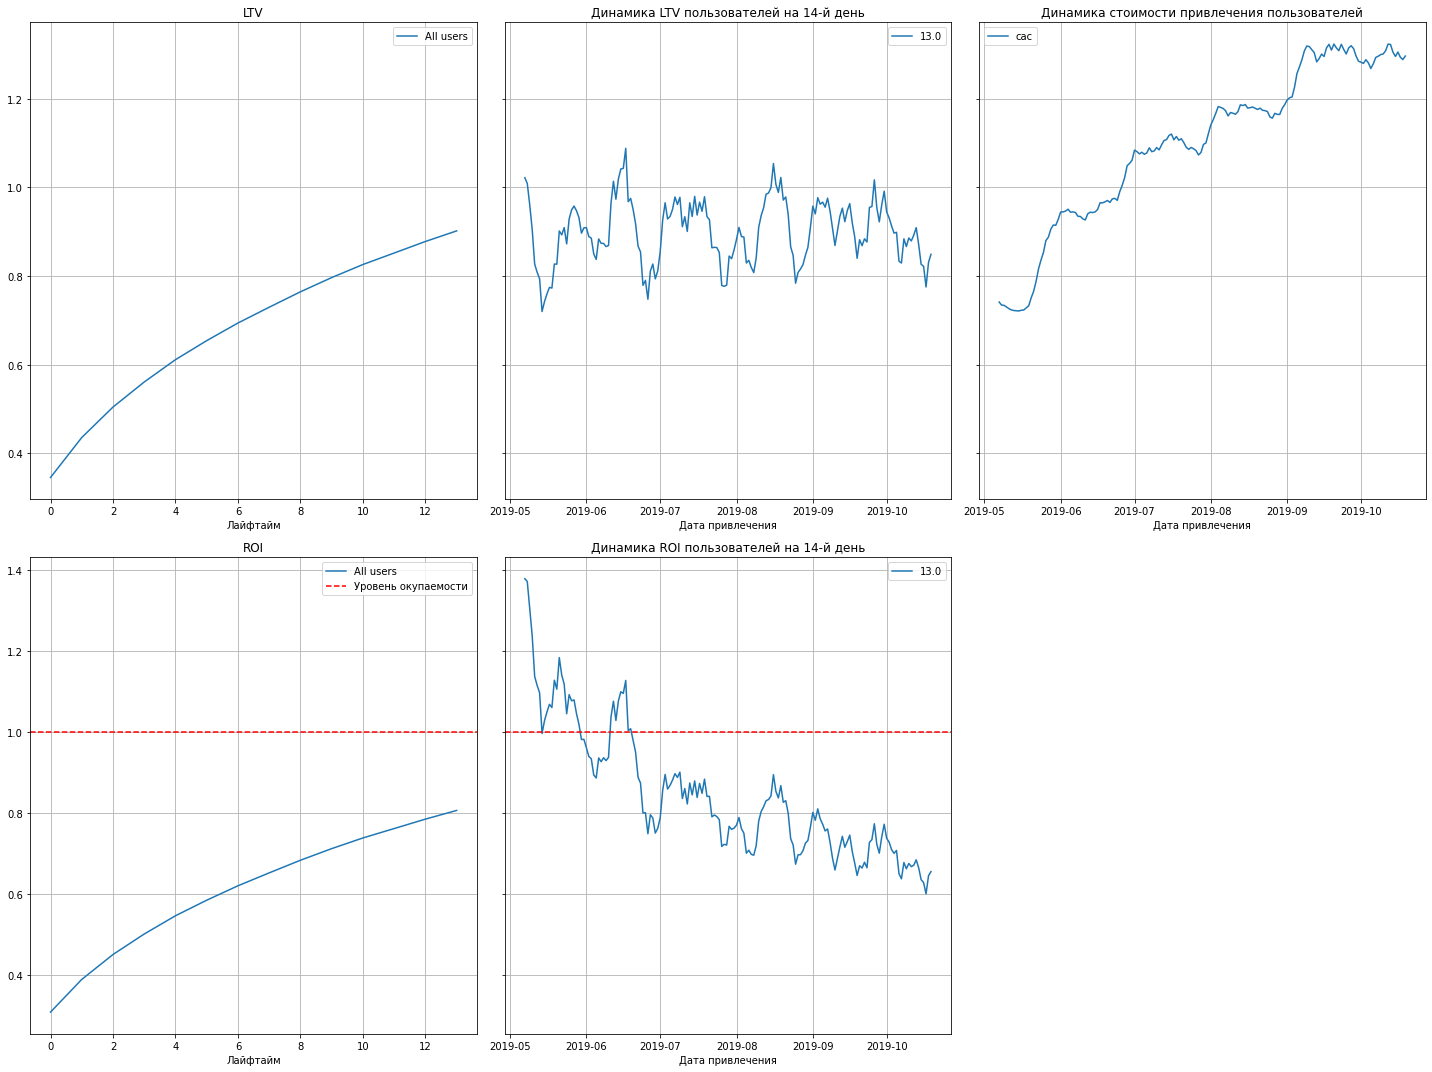

In [37]:
# Посчитаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# Построим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

LTV идёт вверх, но из-за увеличивающихся затртат на рекламу, ROI меньеше 1 и реклама не окупается.

#### Анализ конверсии и удержания

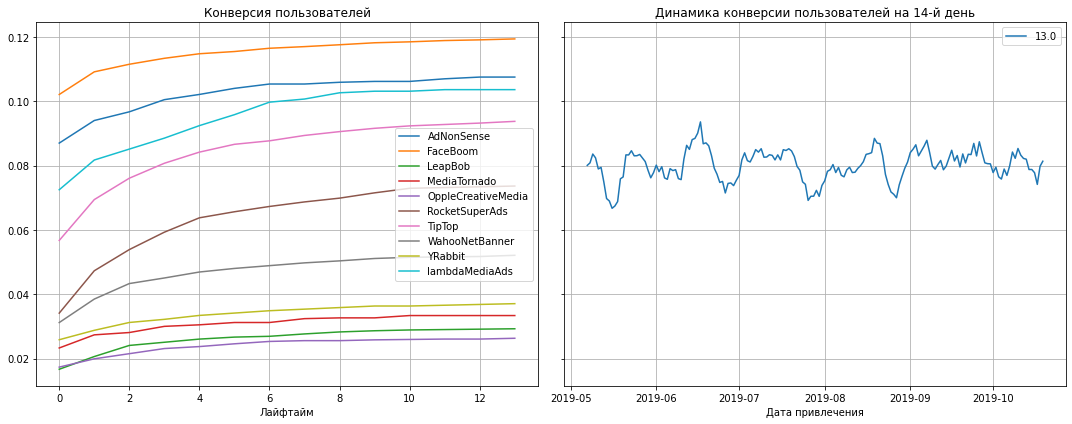

In [38]:
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

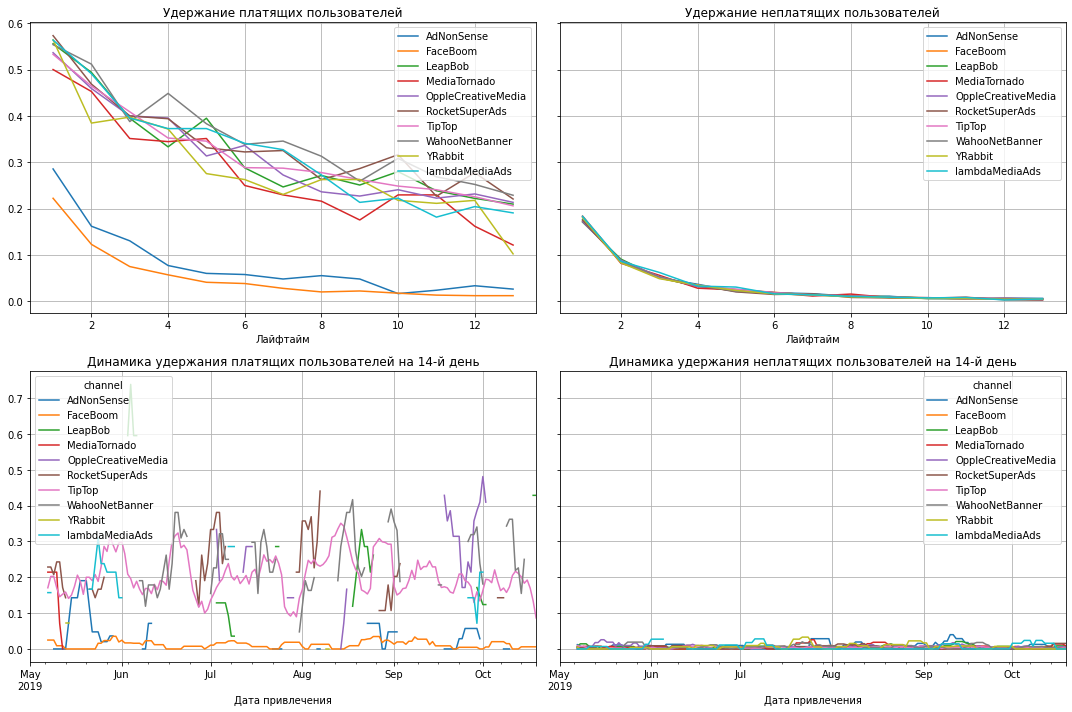

In [39]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

С конверсией всё хорошо. Лучшие по конверсии каналы - **FaceBoom**, **AdNonSense**,**lambdaMediaAds** и **TipTop**. Однако на графике удержания платящих пользователей оказывается, что каналы **FaceBoom** и **AdNonSense** имеют самое низкое и минимальное удержание пользователей, когда **TipTop** и **lambdaMediaAds** имеют средние показатели удержания.

Удержание по каналом с самой высокой стоимостью привлечения за человека(**FaceBoom** и **AdNonSense**) выпадает

#### Окупаемость рекламы с разбивкой по устройствам

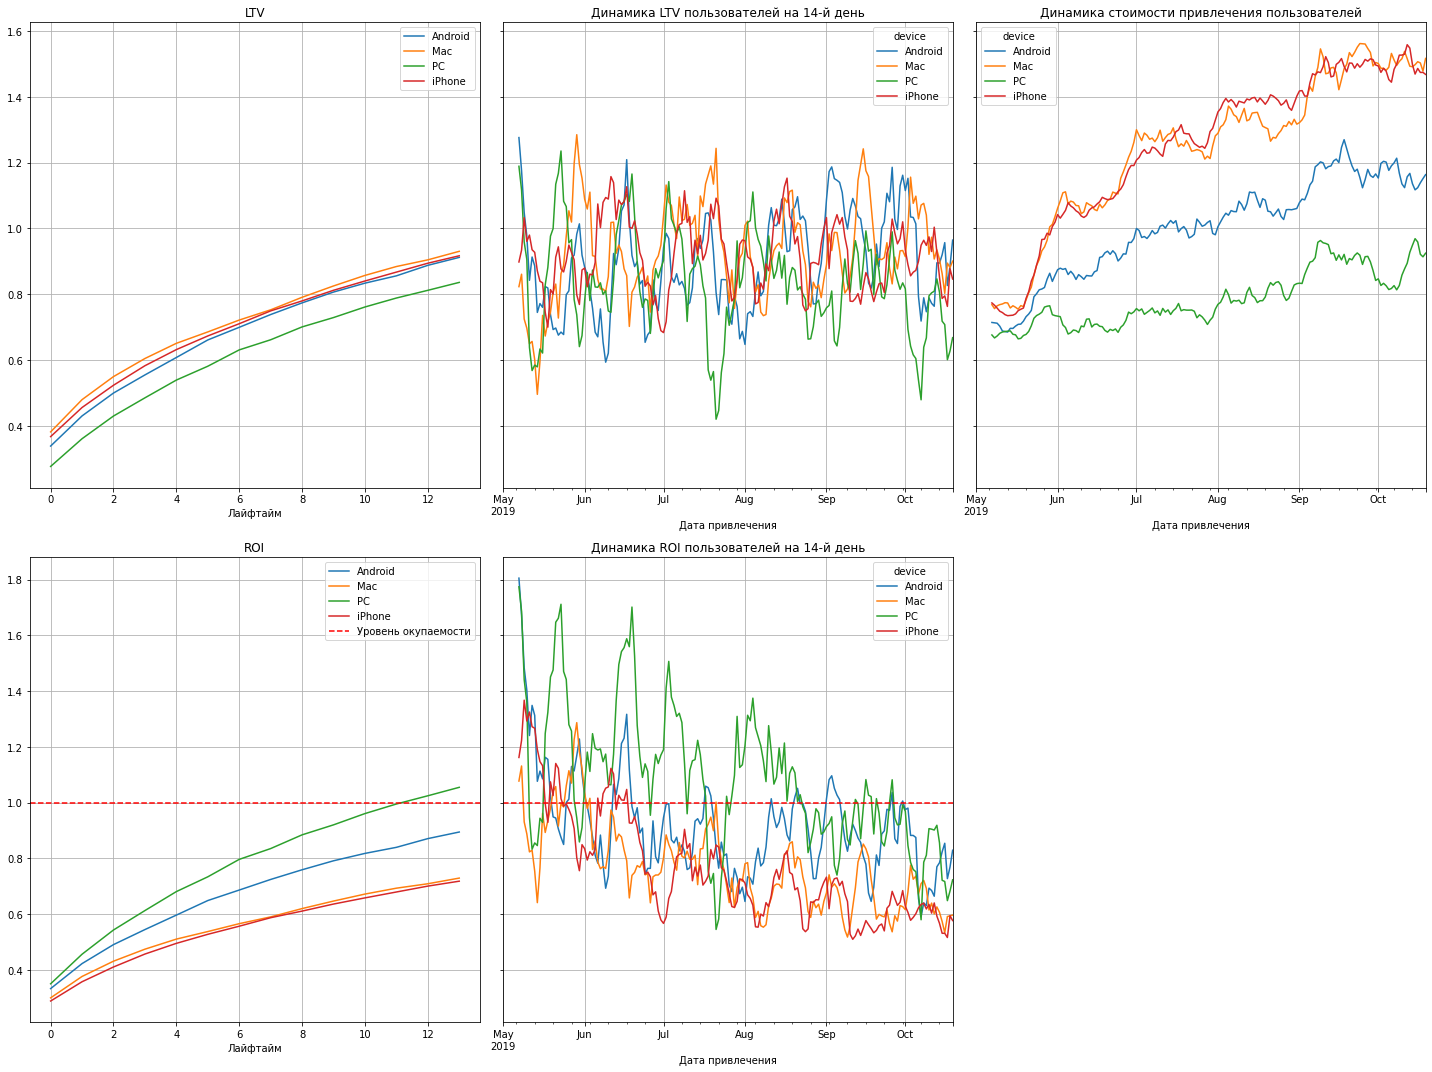

In [40]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped,roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

LTV у всех в норме, немного отстаёт **PC

Затраты на привлечение пользователей PC самые низкие, поэтому только у PC ROI выходит в плюс. 

Самые дорогие и нерентабельные пользователи устройств **iPhone** и **Mac**

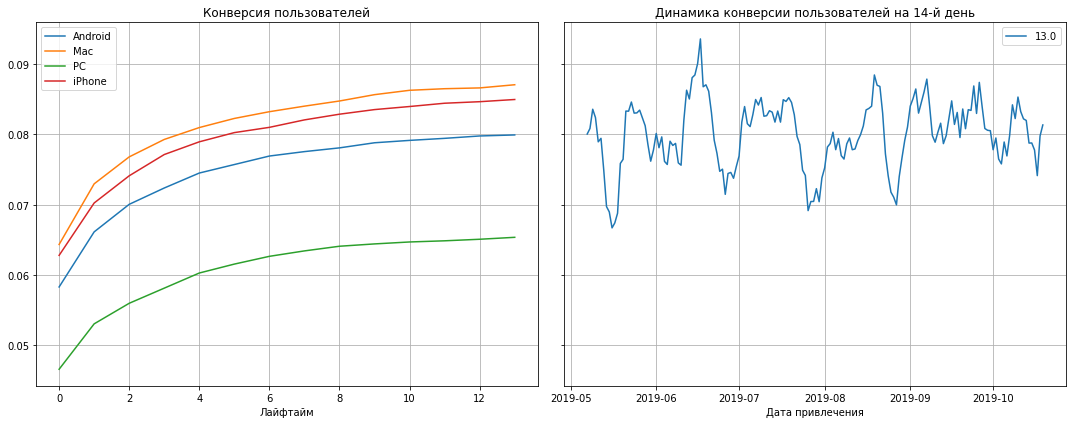

In [41]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

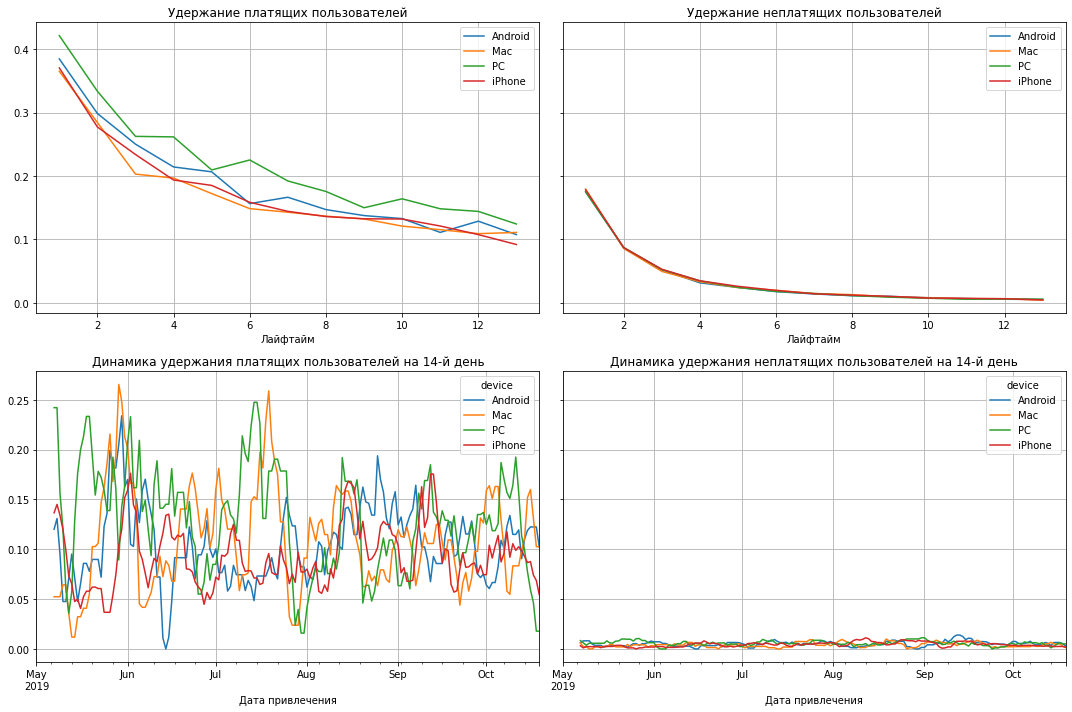

In [42]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Лучшимим по конверсии стали яблочные девайсы - **MAC** и **Iphone**, хуже всех ситуация у **ПК**. Удержание у всех примерно одинаковое, возможно стоит снизить затраты на привлечение других пользователей

#### Окупаемость с разбивкой по странам

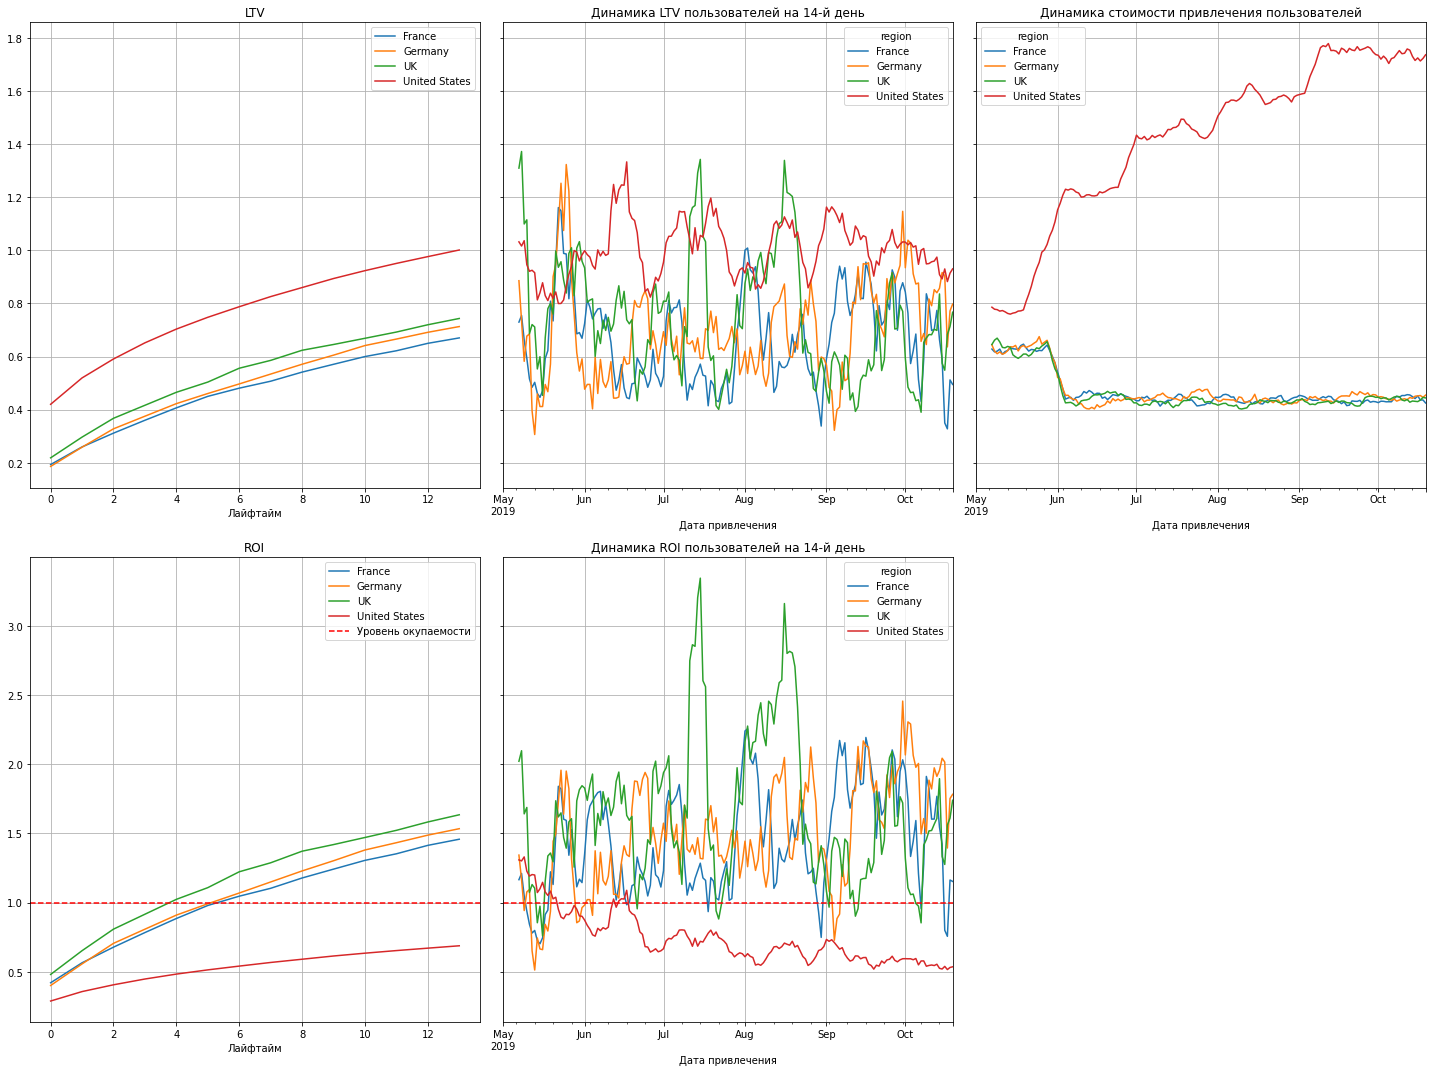

In [43]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)


plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Пользователи из **США** проносят больше денег и больше всего требуют затрат на привлечение.
Привлеченные пользователи из **США** показывают самый высокий LTV, однако пользователи из этой страны себя не окупают. На графике **ROI** мы видим, что пользователи из **США** имеют окупаемость в **60%** и динамика окупаемости постоянно снижается, а стоимость привлечения постоянно растет. А стоимость привлечения других стран снизилась в июне и держится на одном уровне.

В то время как пользователи из остальных стран проходят точку окупаемости на 2-3ый день и показывают стабильную низкую стоимость привлечения.

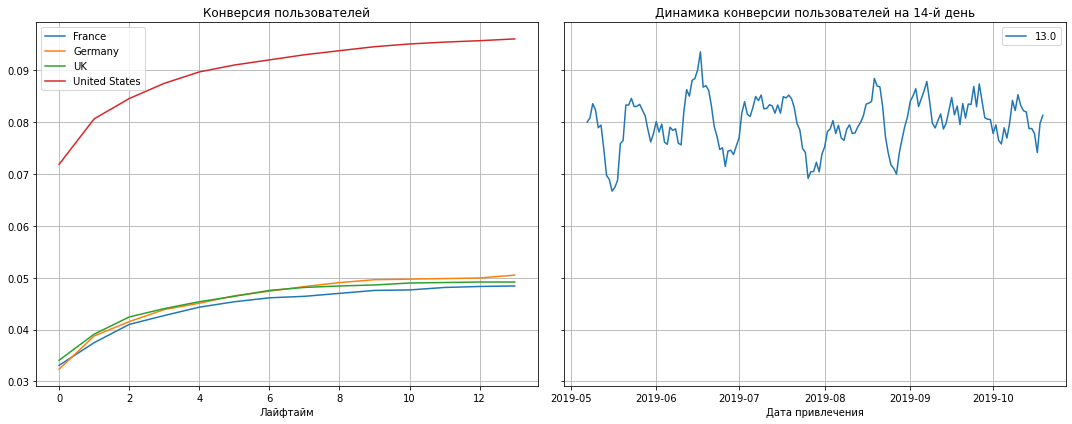

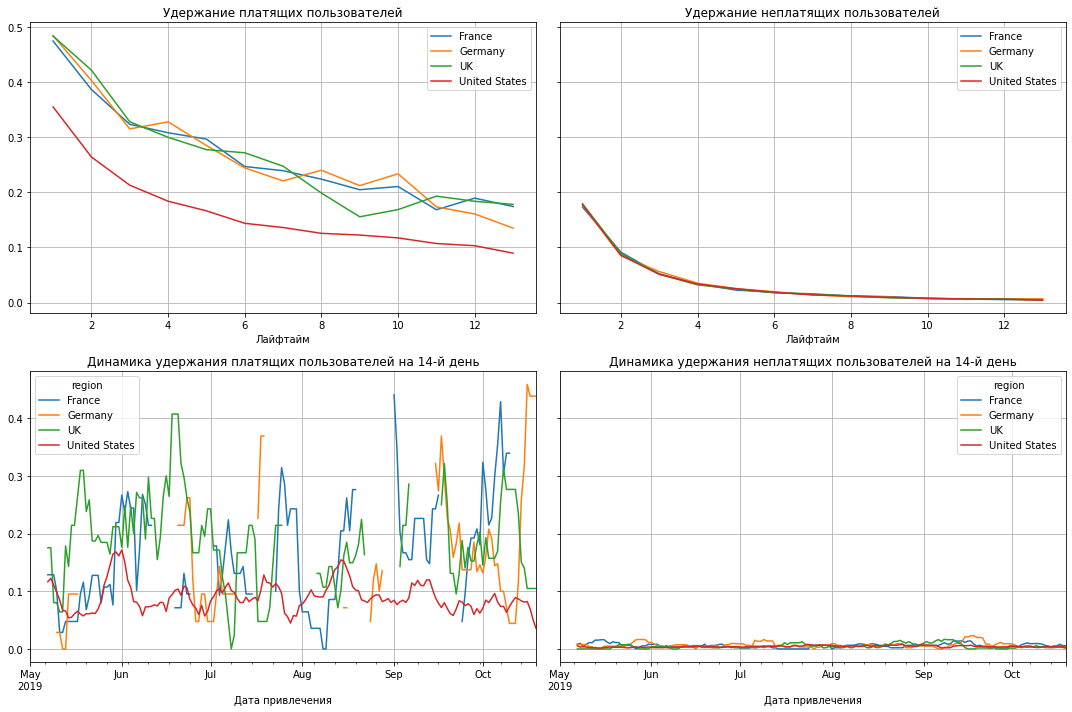

In [44]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 


retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Конверсия пользователей из **США** лучше, чем у остальных регионов, удержание сильно отстаёт.

#### Окупаемость с разбивкой по каналам привлечения

Посмотрим на каналы привлечения по регионам, для начала разделим пользователей **США** и **Европы**

In [45]:
profiles_us = profiles.query('region == "United States"')
print('Доля пользователей из США:',round((len(profiles_us)/len(profiles)), 2))

Доля пользователей из США: 0.66


Очевидно болше пользователей из **США**, начнём с них

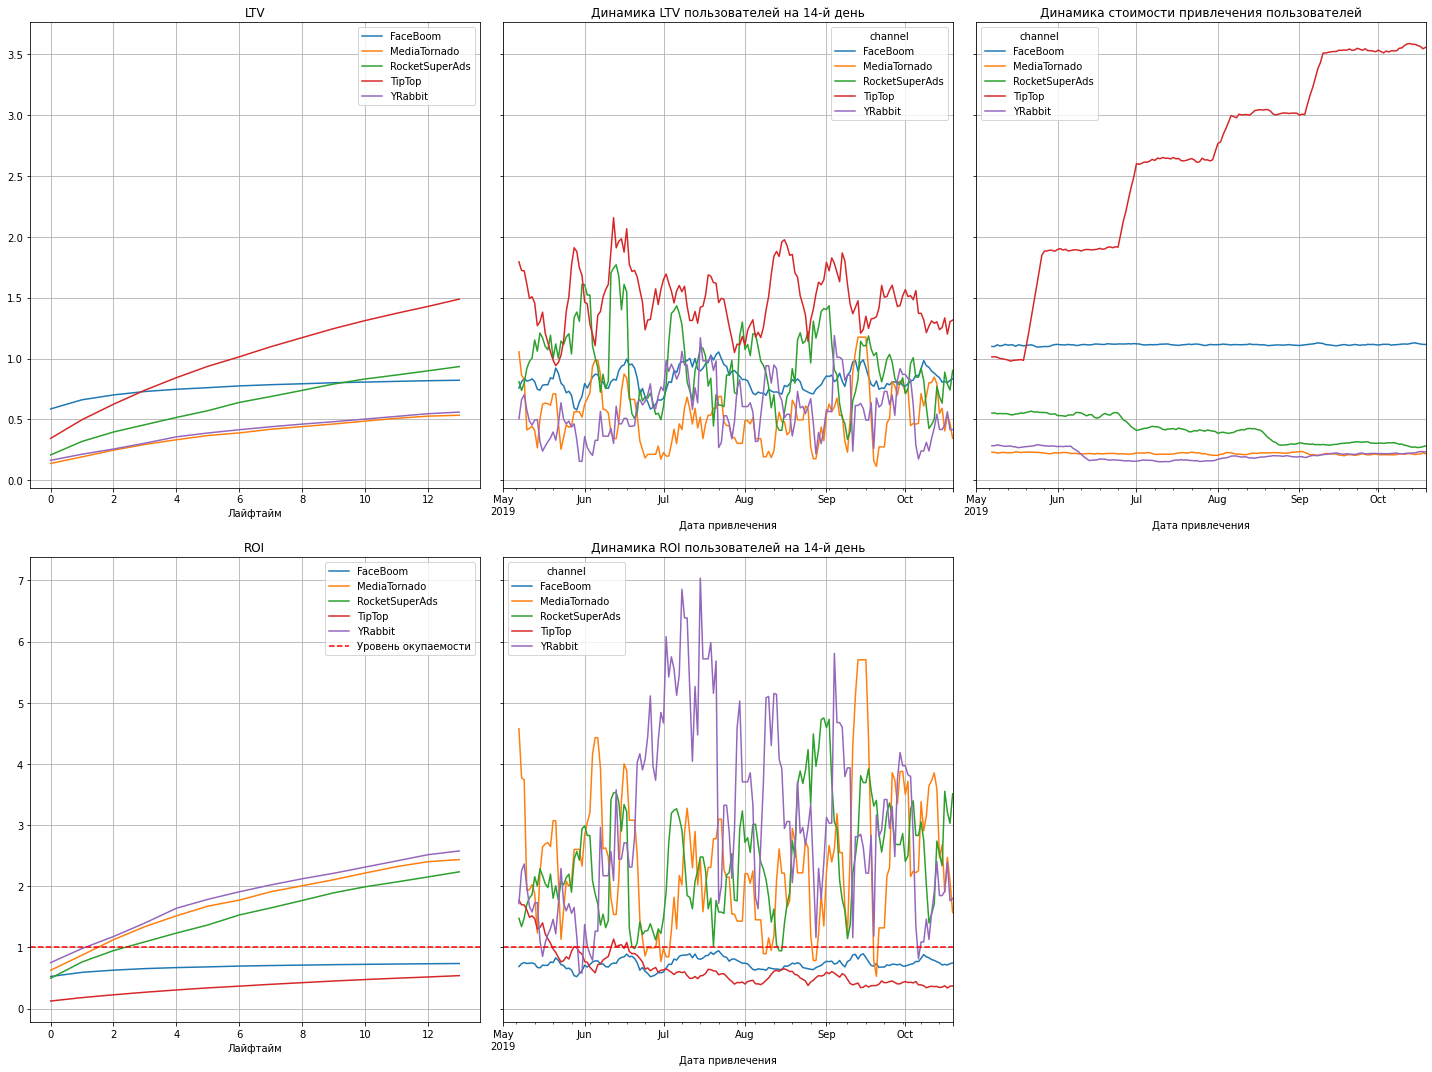

In [46]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_us, orders, observation_date, horizon_days, dimensions=dimensions
)


plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Исходя из информации полученной в граффиках можно сделать следущие выводы: 
    
     Пользователи, которые пришли из Tip Top и FaceBoom, приносят убытки
     
     TipTop показывает самый высокий и стабильный в динамике LTV, но САС при этом постоянно растет
     
     FaceBoom также убыточен, рост его LTV происходит в первые два дня, а САС находится на постоянном уровне, поэтому ROI находится в районе 80-90%.

Посмотрим на ситуацию с **Европой**

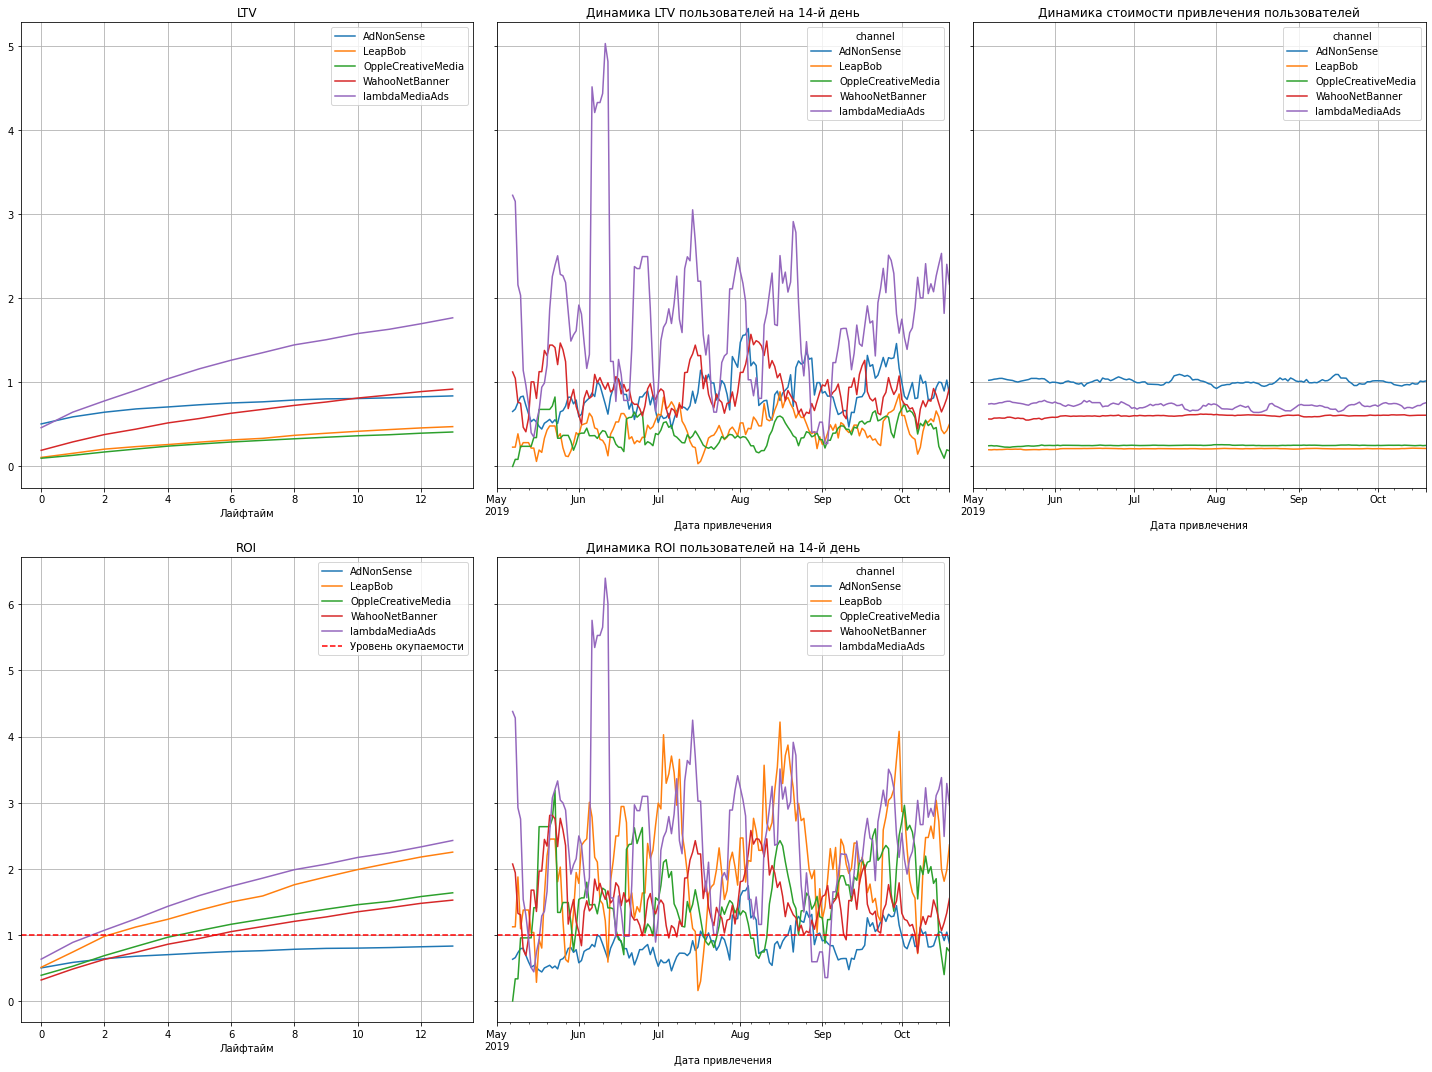

In [47]:
profiles_eu = profiles.query('region != "United States"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_eu, orders, observation_date, horizon_days, dimensions=dimensions
)


plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

У Европы только один канал выподает из общей положительной динамики - **AdNonSense**(табильный CAC около 1 долл, LTV чуть ниже этого показателя, оттого и получаем ROI около 90%.)

#### Выводы
        
        Расходы на рекламу перекрывают доходы
        Показатель LTV стабилен
        Расходы на привлечение постоянно растут
        Не окупаются пользователи всех устройств, кроме PC
        На графиках с разбивкой по странам видно, что выделяются пользователи США: 
                
                1)У них наибольший по сравнению с другими странами LTV
                2)Наибольшие, постоянно растущие при этом расходы на рекламу и слабый показатель удержания
        
        В разбивке по каналам привлечения убытки приносят пользователи США, пришедшие из TipTop и FaceBoom, и пользователи     Европы из AdNonSense.

#### Вывод 

  **Основные причины неэффективности привлечения пользователей:**

    
   - Показатель удержания платящих пользователей из **США** сильно ниже, чем в остальных странах, при том, что **66%** пользователей именно из **США** и на их привлчение тратится больше всего средств.
    
   - Расходы, потраченные на рекламу в **TipTop** и **FaceBoom** в **США** и **AdNonSense** в **Европе** значительно превышают выручку, которую приносят пришедшие пользователи.
    
    
    
   **Рекомендации для отдела маркетинга.**

    
  - Проанализировать причины низкого удержания пользователей, пришедших из **FaceBoom** и **AdNonSense**.
    
  - Оценить целесообразность привлечения пользователей через **TipTop**. Пользователи хоть и с высокой конверисей и **LTV**, но расходы на рекламу слышокм высоки.
    
  - Пересмотреть расходы на источники привлечения пользователей в бользу более рентабельных например, **YRabbit**, **MediaTornado**, **RocketSuperAd** в **США** и **lambdaMediaAds**, **LeapBob** в **Европе**.(На графике LTV мы видим, что каналы **lambdsMediaAds** и **TipTop** показывают хороший рост, в то время как каналы **FaceBoom** и **AdNonSense** имея наибольший **LTV** первого дня с 3-4 дня перестают расти оставаясь на одном уровне и имеют более низкий **LTV** на 14 день, чем **RocketSuperAds** и **WahooNetBanner**. В тоже время каналы **AdNonSense**, **FaceBoom** и **TipTop** не окупаются в отличии от остальных каналов.При этом, следует отметить, что каналы **RocketSuperAds**, **LeapBob**, **lambdaMediaAds**, **MediaTornado** и **YRabbit** показывает окупаемость более 200% на 14-ый день, а каналы **WahooNetBanner** и **OppleCreativeMedia** достигают окупаемости в 150% на 14-ый день.)